<a href="https://colab.research.google.com/github/nikito060195/Chaos-and-Attractors/blob/main/elastomers_attractors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import make_interp_spline
from scipy.stats import gaussian_kde
from matplotlib.collections import LineCollection
from scipy import stats
from scipy import ndimage
import pandas as pd

# **Read Data**

In [2]:
file_path = 't6_1hz.lvm'

df = pd.read_csv(file_path, usecols = [0], names = ['t6_1hz'], header = None)

xaxis = range(0, len(df['t6_1hz']), 1)
yaxis = df['t6_1hz']

FileNotFoundError: ignored

# **Plot routine**

In [64]:
def plot(xaxis, yaxis, limit = None, name = '', atr = None):
  fig = plt.figure(figsize=(8, 6))

  ax = fig.add_subplot(111) 

  if limit != None:
    ax.set_xlim(limit)

  if atr != None:
    ax.set_ylabel(r'$V(t+\Delta t)$', fontsize = 14)
    ax.set_xlabel('V(t)', fontsize = 14)
    color = 'brown'
  else:
    ax.set_ylabel('V(t)', fontsize = 14)
    ax.set_xlabel('t', fontsize = 14)
    color = 'navy'
    
  ax.plot(xaxis, yaxis, c = color, linewidth = 2)
  ax.tick_params(axis='both', which='major', labelsize=13)

  

  if name == '':
    plt.savefig('semnome.png', dpi = 700)

  else:
    plt.savefig(name, dpi = 700)    

  plt.show()

# **Attractor code**

## Attractor subroutine

In [58]:
def attr_routine(yaxis, min, max): 
  att = []
  new_x = []

  dt = 10 #interval to v(t + dt)

  for cnt in np.arange(min, max, 1):
    if cnt > min + dt:
      att.append(yaxis[cnt])
      new_x.append(yaxis[cnt - dt])


  att = np.array(att)
  new_x = np.array(new_x)

  sigma = 6
  new_x = ndimage.gaussian_filter1d(new_x, sigma)
  att = ndimage.gaussian_filter1d(att, sigma)

  return new_x, att

## Subroutine to periodic data create

In [59]:
def signal(y0, A, omega, t):
  y = []
  for time in t:
    y.append(y0 + A * np.sin(omega * time))

  return y

## Create a virtual system

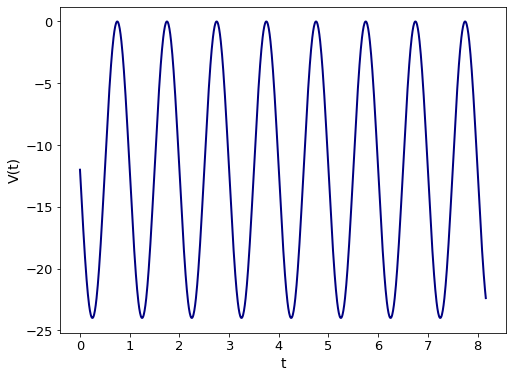

In [65]:
time = np.arange(0,8.17,1./120.)
f = 1.
y0 = -12.

amp = -12.

omega = 2. * np.pi * f

y = signal(y0, amp, omega, time)

plot(time, y,name='wave')


## Attractor to virtual data

In [61]:
min_virt = 0
max_virt = len(time)

x_virt, y_virt = attr_routine(y, min_virt, max_virt)

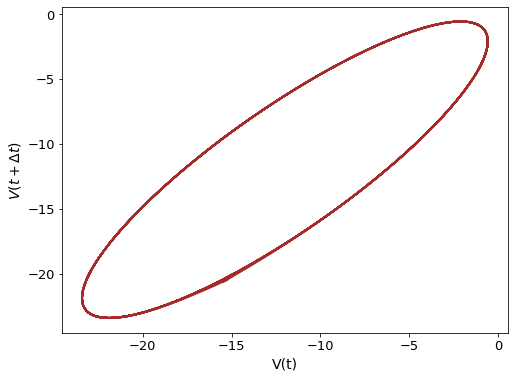

In [66]:
plot(x_virt, y_virt,name='atr_simul', atr=True)

## Plot data

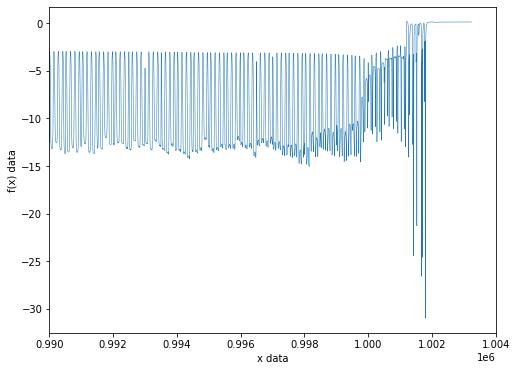

In [41]:
plot(xaxis, yaxis, [0.99e6,1.004e6])

## Create Attractor


In [42]:
min = 0.980e6 #initial time to attractor

max = 0.988e6 #final time to attractor

x_att, y_att = attr_routine(yaxis, min, max)

#print(att)

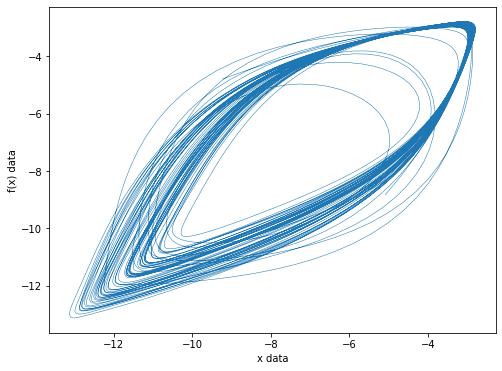

In [43]:
plot(x_att, y_att)